# COGS 109 Final Project Notebook
Raam Chaklashiya A16154997

Christopher Tams A17559278

Emmamuel Gutierrez A15769736

# NFL Positional Predicting Model Using Multi-Class KNN

In [1]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Cleaning

In [2]:
# read data
data = pd.read_csv("Basic_Stats.csv")
data

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17167,73.0,"Detroit , MI",2/15/1944,Michigan State,Retired,NaN,1 Season,71.0,NaN,NaN,"Goovert, Ron",NaN,rongoovert/2515082,NaN,225.0,1967 - 1967
17168,32.0,"Worland , WY",8/19/1984,Weber State,Retired,NaN,1 Season,75.0,NaN,NaN,"Folsom, J.D.",NaN,j.d.folsom/238485,NaN,230.0,2009 - 2010
17169,43.0,"Washington , DC",5/4/1974,Akron,Retired,NaN,1 Season,72.0,NaN,NaN,"Reader, Jamie",NaN,jamiereader/2502599,NaN,238.0,2001 - 2001
17170,NaN,"New Willard , TX",3/30/1921,Baylor,Retired,NaN,2 Seasons,73.0,NaN,NaN,"Barnett, Solon",NaN,solonbarnett/2509044,NaN,235.0,1945 - 1946


In [3]:
# drop irrelevant columns
data = data.drop(["Birthday", "College", "Current Team", "High School Location", "Number", "Birth Place", "High School", "Years Played"], axis=1)
data

,Age,Current Status,Experience,Height (inches),Name,Player Id,Position,Weight (lbs)
0,NaN,Retired,3 Seasons,71.0,"Evans, Fred",fredevans/2513736,NaN,185.0
1,NaN,Retired,1 Season,70.0,"Raiff, Jim",jimraiff/2523700,NaN,235.0
2,56.0,Retired,1 Season,74.0,"Fowler, Bobby",bobbyfowler/2514295,NaN,230.0
3,30.0,Retired,5 Seasons,73.0,"Johnson, Quinn",quinnjohnson/79593,NaN,255.0
4,25.0,Active,3rd season,77.0,"Walton, L.T.",l.t.walton/2552444,DE,305.0
...,...,...,...,...,...,...,...,...
17167,73.0,Retired,1 Season,71.0,"Goovert, Ron",rongoovert/2515082,NaN,225.0
17168,32.0,Retired,1 Season,75.0,"Folsom, J.D.",j.d.folsom/238485,NaN,230.0
17169,43.0,Retired,1 Season,72.0,"Reader, Jamie",jamiereader/2502599,NaN,238.0
17170,NaN,Retired,2 Seasons,73.0,"Barnett, Solon",solonbarnett/2509044,NaN,235.0


In [4]:
# doing this removes all retired players since they don't have a position and all years played since they are still active
data = data.dropna(subset=['Position', 'Age'])
data

,Age,Current Status,Experience,Height (inches),Name,Player Id,Position,Weight (lbs)
4,25.0,Active,3rd season,77.0,"Walton, L.T.",l.t.walton/2552444,DE,305.0
7,22.0,Active,Rookie,77.0,"Leggett, Jordan",jordanleggett/2557885,TE,250.0
17,25.0,Active,1st season,74.0,"Garner, Manasseh",manassehgarner/2553801,TE,220.0
35,29.0,Active,8th season,71.0,"Coleman, Kurt",kurtcoleman/494261,SS,200.0
37,26.0,Active,4th season,72.0,"Carrie, T.J.",t.j.carrie/2550164,SS,205.0
...,...,...,...,...,...,...,...,...
17127,24.0,Injured reserve,Rookie,73.0,"Magloire, Paul",paulmagloire/2558972,DB,210.0
17140,37.0,Active,16th season,79.0,"Peppers, Julius",juliuspeppers/2505010,DE,287.0
17151,27.0,Active,1st season,75.0,"Bishop, Freddie",freddiebishop/2542053,OLB,255.0
17155,29.0,Active,8th season,80.0,"Young, Sam",samyoung/2508058,T,320.0


In [5]:
# 27 total classes
data.get("Position").unique()

array(['DE', 'TE', 'SS', 'DB', 'OT', 'CB', 'G', 'OG', 'C', 'QB', 'MLB',
       'FS', 'DT', 'WR', 'OLB', 'T', 'LB', 'RB', 'ILB', 'K', 'NT', 'LS',
       'P', 'SAF', 'FB', 'DL', 'OL'], dtype=object)

In [6]:
# look at the unique seasons
data.get("Experience").unique()

array(['3rd season', 'Rookie', '1st season', '8th season', '4th season',
       '2nd season', '6th season', '11th season', '9th season',
       '7th season', '5th season', '18th season', '14th season',
       '10th season', '12th season', '19th season', '13th season',
       '17th season', '15th season', '16th season', '22nd season'],
      dtype=object)

In [7]:
#Doing this made the Accuracy 0.5% better
#for x in data.get("Experience").unique():
#    if x == "Rookie":
#        data = data.replace(to_replace="Rookie",
#           value=0)
#    else:
#        if x[1] == "s" or x[1] == "r" or x[1] == "t" or x[1] == "n":
#            data = data.replace(to_replace=x,
#           value=str(x[0]))
#        else:
#            data = data.replace(to_replace=x,
#           value=str(x[:2]))
#data

In [8]:
# drop more columns
#data = data.drop(["Current Status", "Name", "Player Id"], axis=1)
data = data.drop(["Current Status", "Name", "Player Id", "Experience"], axis=1)

data

,Age,Height (inches),Position,Weight (lbs)
4,25.0,77.0,DE,305.0
7,22.0,77.0,TE,250.0
17,25.0,74.0,TE,220.0
35,29.0,71.0,SS,200.0
37,26.0,72.0,SS,205.0
...,...,...,...,...
17127,24.0,73.0,DB,210.0
17140,37.0,79.0,DE,287.0
17151,27.0,75.0,OLB,255.0
17155,29.0,80.0,T,320.0


In [9]:
# rename height and weight columns for simplicity
data = data.rename(columns={"Height (inches)": "Height", "Weight (lbs)": "Weight"})
data

,Age,Height,Position,Weight
4,25.0,77.0,DE,305.0
7,22.0,77.0,TE,250.0
17,25.0,74.0,TE,220.0
35,29.0,71.0,SS,200.0
37,26.0,72.0,SS,205.0
...,...,...,...,...
17127,24.0,73.0,DB,210.0
17140,37.0,79.0,DE,287.0
17151,27.0,75.0,OLB,255.0
17155,29.0,80.0,T,320.0


In [10]:
# can drop OL and DL positions since there are only 4 players but it only
# increases the accuracy by around 0.5%
# data = data[data.get("Position") != "OL"]
# data = data[data.get("Position") != "DL"]
data

,Age,Height,Position,Weight
4,25.0,77.0,DE,305.0
7,22.0,77.0,TE,250.0
17,25.0,74.0,TE,220.0
35,29.0,71.0,SS,200.0
37,26.0,72.0,SS,205.0
...,...,...,...,...
17127,24.0,73.0,DB,210.0
17140,37.0,79.0,DE,287.0
17151,27.0,75.0,OLB,255.0
17155,29.0,80.0,T,320.0


In [11]:
# dropping age increases accuracy by 0.5% as well
# data = data.drop(["Age"], axis=1)
data

,Age,Height,Position,Weight
4,25.0,77.0,DE,305.0
7,22.0,77.0,TE,250.0
17,25.0,74.0,TE,220.0
35,29.0,71.0,SS,200.0
37,26.0,72.0,SS,205.0
...,...,...,...,...
17127,24.0,73.0,DB,210.0
17140,37.0,79.0,DE,287.0
17151,27.0,75.0,OLB,255.0
17155,29.0,80.0,T,320.0


## Modelling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [13]:
# counts of each position in the true labels
data.get("Position").value_counts()

WR     378
DE     238
CB     214
RB     213
DB     202
TE     196
LB     184
DT     167
OG     152
OLB    140
OT     127
QB     126
C       91
T       70
SS      62
FS      59
ILB     55
K       46
G       45
LS      44
P       44
NT      32
FB      26
SAF     23
MLB     21
DL       3
OL       1
Name: Position, dtype: int64

In [14]:
X = data.drop(columns=['Position']) # isolate predictors
Y = data["Position"].values # true labels

In [15]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [16]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
# score on the test set with 3 neighbors without cross validation
knn.score(X_test, y_test)

0.3091216216216216

In [18]:
# score on the entire dataset with 3 neighbors
knn.score(X,Y)

0.5258533288273065

In [19]:
# create new model
knn_grid = KNeighborsClassifier()
# test 1-100 neighbors
param_grid = {'n_neighbors': np.arange(1, 101)}
# use gridsearch to test 1-100 neighbors
knn_gscv = GridSearchCV(knn_grid, param_grid, cv=5)
knn_gscv.fit(X, Y)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])})

In [20]:
# neighbor parameter that gave the highest accuracy
knn_gscv.best_params_

{'n_neighbors': 48}

In [21]:
# highest cross validation accuracy using the parameter above
knn_gscv.best_score_

0.3663436914071432

In [22]:
# look at gridsearchCV data
gs_data = pd.DataFrame(knn_gscv.cv_results_)
gs_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003066,0.000101,0.011248,0.000092,1,{'n_neighbors': 1},0.285473,0.314189,0.277027,0.246622,0.299492,0.284561,0.022794,99
1,0.003010,0.000037,0.011638,0.000135,2,{'n_neighbors': 2},0.277027,0.277027,0.265203,0.212838,0.257191,0.257857,0.023732,100
2,0.003036,0.000030,0.011991,0.000502,3,{'n_neighbors': 3},0.292230,0.327703,0.297297,0.261824,0.280880,0.291987,0.021620,98
3,0.002989,0.000042,0.011859,0.000152,4,{'n_neighbors': 4},0.304054,0.326014,0.324324,0.285473,0.307953,0.309563,0.014844,97
4,0.003003,0.000055,0.011984,0.000113,5,{'n_neighbors': 5},0.339527,0.334459,0.342905,0.304054,0.297800,0.323749,0.018931,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002966,0.000060,0.021635,0.000984,96,{'n_neighbors': 96},0.334459,0.351351,0.349662,0.341216,0.340102,0.343358,0.006293,87
96,0.002975,0.000063,0.021578,0.000910,97,{'n_neighbors': 97},0.341216,0.354730,0.354730,0.342905,0.338409,0.346398,0.006953,79
97,0.002976,0.000050,0.021684,0.000941,98,{'n_neighbors': 98},0.331081,0.359797,0.353041,0.337838,0.338409,0.344033,0.010653,85
98,0.002967,0.000043,0.021715,0.001016,99,{'n_neighbors': 99},0.336149,0.356419,0.351351,0.341216,0.345178,0.346063,0.007180,81


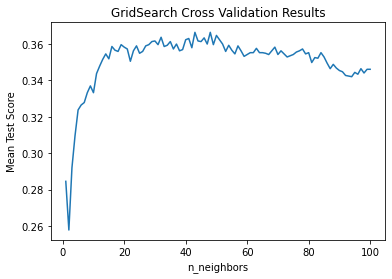

In [23]:
# plot of gridsearch cross validation mean test score for each n_neighbors
plt.plot(gs_data["param_n_neighbors"], gs_data["mean_test_score"])
plt.title("GridSearch Cross Validation Results")
plt.xlabel("n_neighbors")
plt.ylabel("Mean Test Score");

In [24]:
# look at the detailed stats of the rank 1 k value, k=48
gs_data[gs_data.get("rank_test_score")==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
47,0.003,0.000048,0.016545,0.000492,48,{'n_neighbors': 48},0.373311,0.388514,0.353041,0.339527,0.377327,0.366344,0.017645,1


In [25]:
# look at the detailed stats of the rank 2 k value, k=43
gs_data[gs_data.get("rank_test_score")==2]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
42,0.003056,0.000099,0.016059,0.000414,43,{'n_neighbors': 43},0.369932,0.378378,0.371622,0.339527,0.37225,0.366342,0.013708,2


In [26]:
# Choose k=43 since it has neraly identical mean accuracy on the cross validation as k=48 but uses 5 less neighbors
# Create final classifier with best neighbor parameter, k=43
knn_final = KNeighborsClassifier(n_neighbors = 43)
# Fit the classifier to the entire (cleaned) dataset
knn_final.fit(X,Y)

KNeighborsClassifier(n_neighbors=43)

In [27]:
# Final accuracy
knn_final.score(X,Y)

0.4052044609665427

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['DE' 'TE' 'SS' 'DB' 'OT' 'CB' 'G' 'OG' 'C' 'QB' 'MLB' 'FS' 'DT' 'WR'
 'OLB' 'T' 'LB' 'RB' 'ILB' 'K' 'NT' 'LS' 'P' 'SAF' 'FB' 'DL' 'OL'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


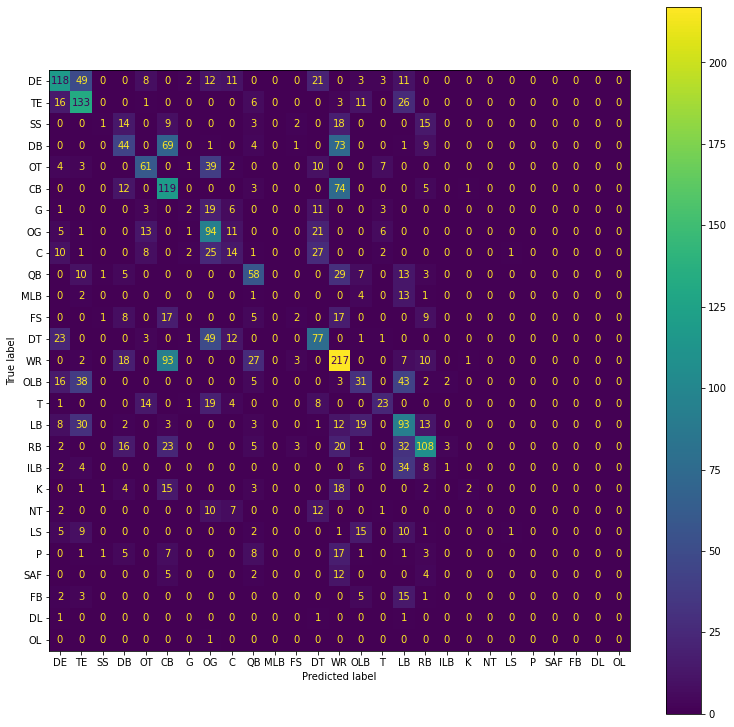

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# confusion matrix of our final model
y_pred = knn_final.predict(X)
cm = confusion_matrix(Y, y_pred, data.get("Position").unique())#, labels=data.get("Position").unique())
cm_display = ConfusionMatrixDisplay(cm, display_labels=data.get("Position").unique())
fig, ax = plt.subplots(figsize=(13,13))
cm_display.plot(ax=ax)

# save the figure to a file
plt.savefig('confusion_matrix.png')